<a href="https://colab.research.google.com/github/Hamdan070905/AI-ML-Task5/blob/main/AI_ML_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix


In [33]:
df = pd.read_csv("heart.csv")
df
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [34]:
df.isnull().sum()
print(df.isnull().sum())
df.info()
print(df.info())
x = df.drop("target", axis=1)
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
<class 

In [16]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
print("Decision Tree Accuracy:",accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



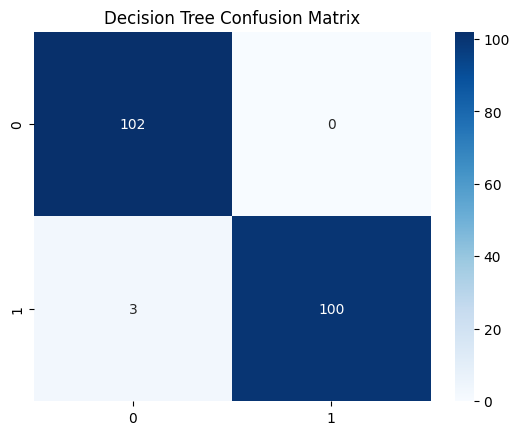

In [39]:
sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

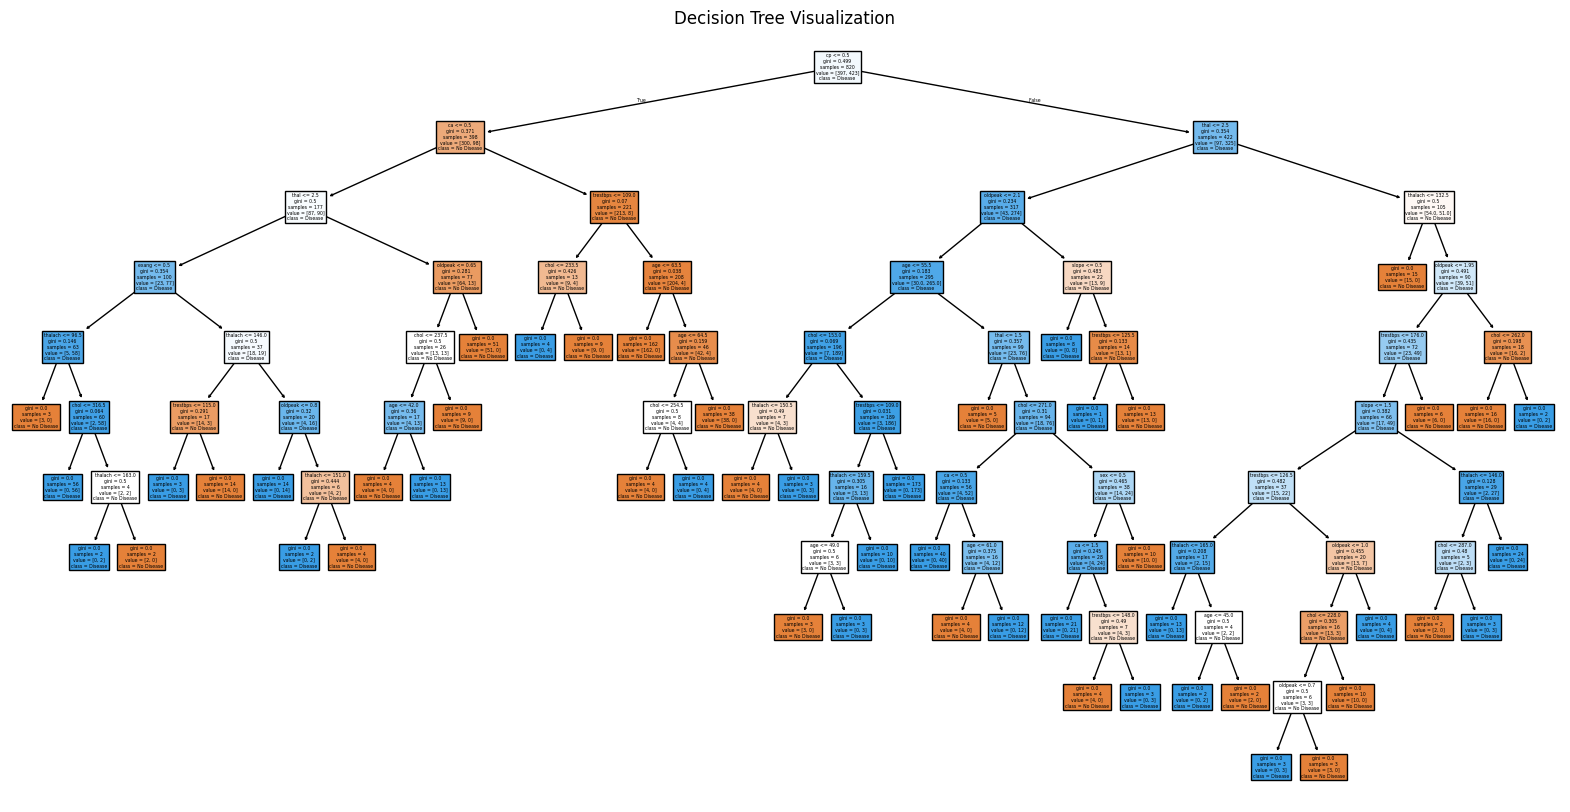

In [44]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [21]:
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(x_train, y_train)

y_pred_pruned = dt_pruned.predict(x_test)

print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.7804878048780488


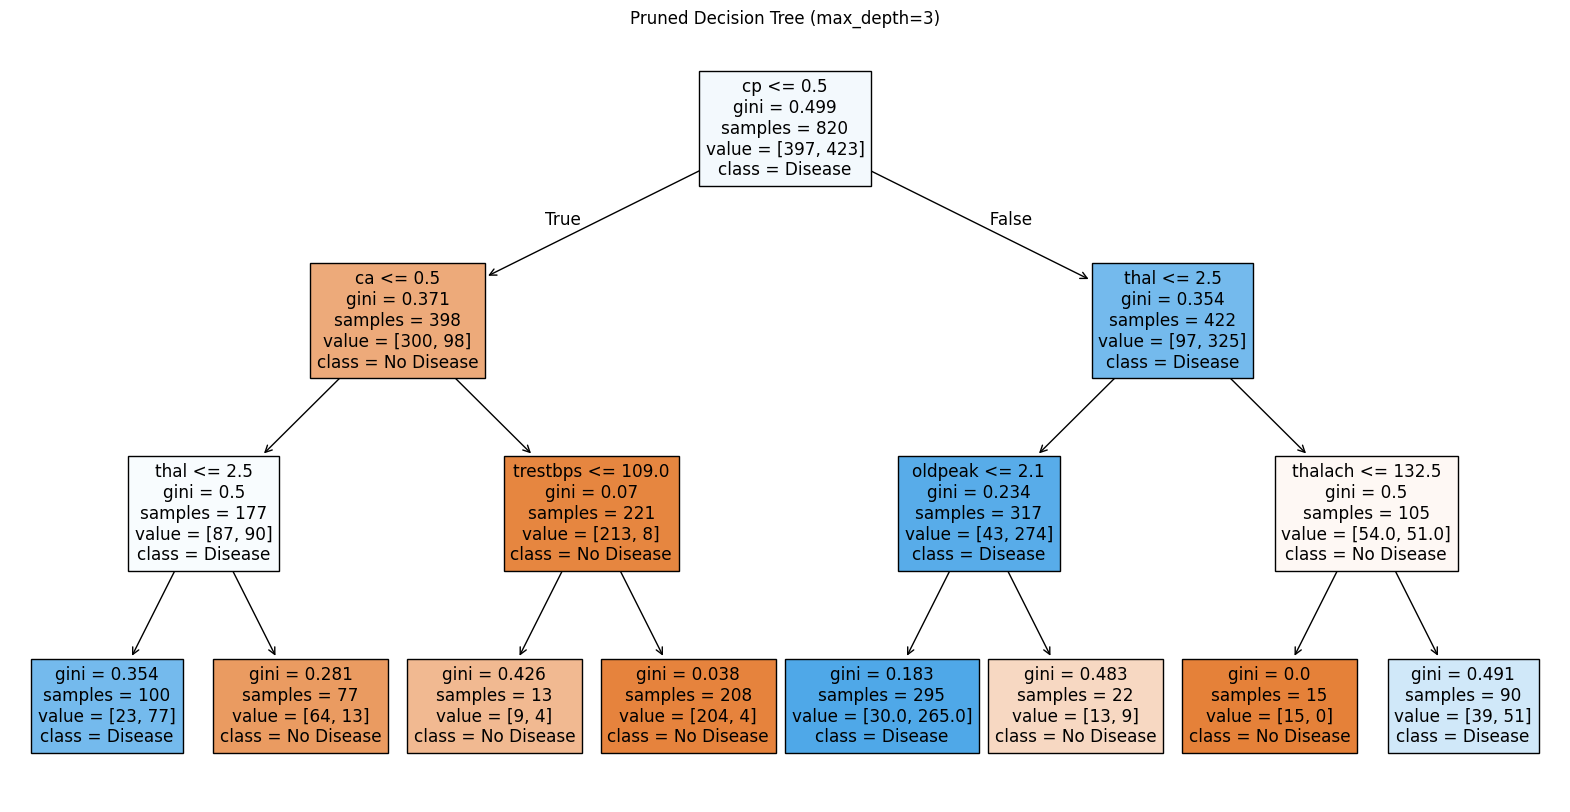

In [46]:
plt.figure(figsize=(20,10))
plot_tree(dt_pruned, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title('Pruned Decision Tree (max_depth=3)')
plt.show()

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



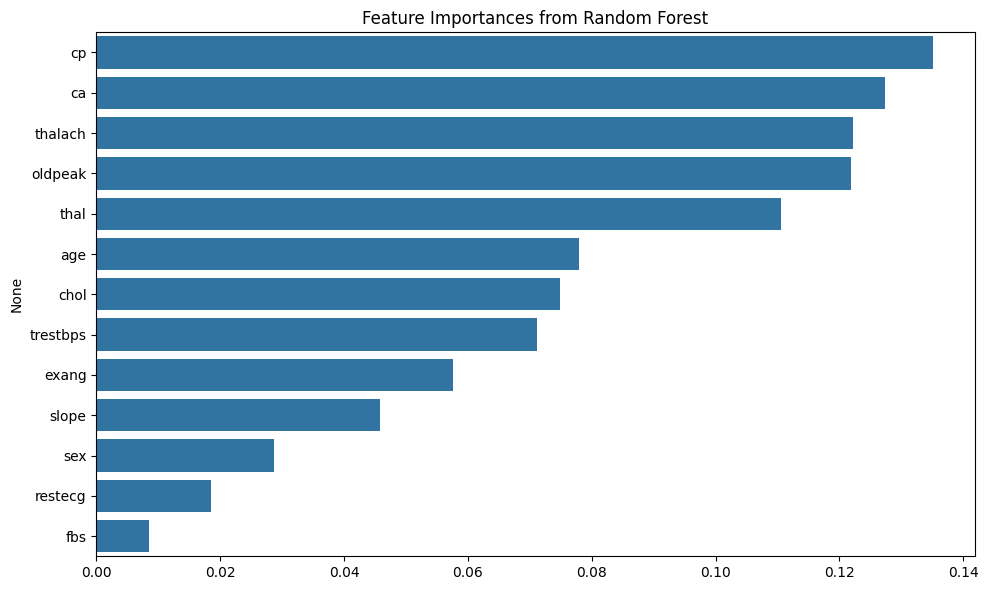

In [26]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()


In [28]:
rf_cv_scores = cross_val_score(rf_model, x, y, cv=5)
print("Random Forest CV Mean Accuracy:", rf_cv_scores.mean())

dt_cv_scores = cross_val_score(dt_pruned, x, y, cv=5)
print("Pruned Decision Tree CV Mean Accuracy:", dt_cv_scores.mean())


Random Forest CV Mean Accuracy: 0.9970731707317073
Pruned Decision Tree CV Mean Accuracy: 0.8302439024390245
